#      LOADING THE DATA (Mnist)

## 1. Load the Necessary Libraries

In [1]:
from tensorflow.keras.datasets import mnist 
import pandas as pd
import matplotlib.pyplot as plt

## 2. Making a Suitable Data for Our  CNN Model 

In [2]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [3]:
# normalize the data
X_train_ = X_train / 255 # after this nomalization the values of the dataset will be from 0 to 1
X_test_ = X_test / 255 

In [4]:
X_train = X_train_.reshape(-1, 28,28, 1) # 28*28 because the mnist data images are wiht 28*28 size 
X_test = X_test_.reshape(-1, 28,28, 1) # we use -1 to maake the value calculated automatically 

## 3. Visualization

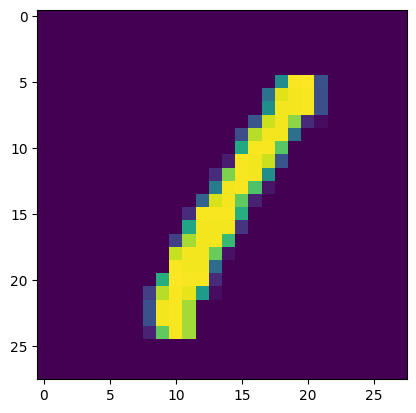

In [5]:
plt.imshow(X_train[3])

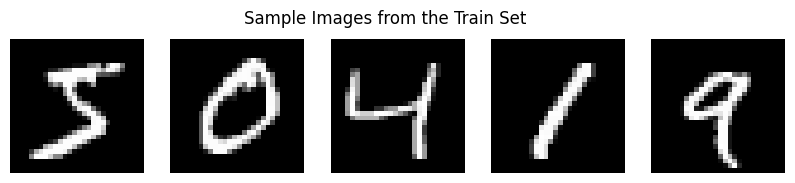

In [7]:
import matplotlib.pyplot as plt

#the training set
fig, axes = plt.subplots(1, 5, figsize=(10, 2))  
for i in range(5):
    axes[i].imshow(X_train[i].reshape(28, 28), cmap="gray")  # Reshape the 28x28 image and display it
    axes[i].axis('off')  # Hide the axes
plt.suptitle('Sample Images from the Train Set')  # Title for the plot
plt.show()

## Build The Model 

In [32]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import HeUniform
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [22]:
# the sequence api for keras 
model = Sequential() # api From keras
# First convolutional layer
model.add(Conv2D(32, (3,3), activation="relu", kernel_initializer=HeUniform(), input_shape=(28,28,1))),


model.add( MaxPooling2D(2,2))  # Apply 2x2 max pooling, reduces the size of the feature map

    # Second convolutional layer
model.add(Conv2D(64, (3,3), activation="relu", kernel_initializer=HeUniform()))

model.add(MaxPooling2D(2,2))  # Apply 2x2 max pooling, reduces the size of the feature map

    # Third convolutional layer
model.add(Conv2D(64, (3,3), activation="relu", kernel_initializer=HeUniform()))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation="relu" ,  kernel_initializer=HeUniform())) 
model.add(Dense(10, activation="softmax")) 

- Adam Optimazer (Adaptive Moment Estimation) determine how the weights and bais will chnage to reduce the cost function

In [23]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy" , metrics=["accuracy"])

- batch_size : how much data will enter in each iteration 

In [24]:
fit = model.fit(X_train, y_train , epochs=10 , batch_size = 64 ,validation_data=(X_test,y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 38ms/step - accuracy: 0.8632 - loss: 0.4553 - val_accuracy: 0.9719 - val_loss: 0.0883
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 34ms/step - accuracy: 0.9762 - loss: 0.0767 - val_accuracy: 0.9795 - val_loss: 0.0672
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 36ms/step - accuracy: 0.9840 - loss: 0.0521 - val_accuracy: 0.9843 - val_loss: 0.0516
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9880 - loss: 0.0376 - val_accuracy: 0.9832 - val_loss: 0.0531
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9902 - loss: 0.0304 - val_accuracy: 0.9838 - val_loss: 0.0573
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 48ms/step - accuracy: 0.9922 - loss: 0.0241 - val_accuracy: 0.9854 - val_loss: 0.0519
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 40ms/step - accuracy: 0.9934 - loss: 0.0203 - val_accuracy: 0.9873 - val_loss: 0.0482
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.9938 - loss: 0.0184 - 

## test the perfermnce 

In [26]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9807 - loss: 0.0725 


In [27]:
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

Test Loss: 0.05766443908214569
Test Accuracy: 0.984499990940094


In [28]:
# plt.plot(  )

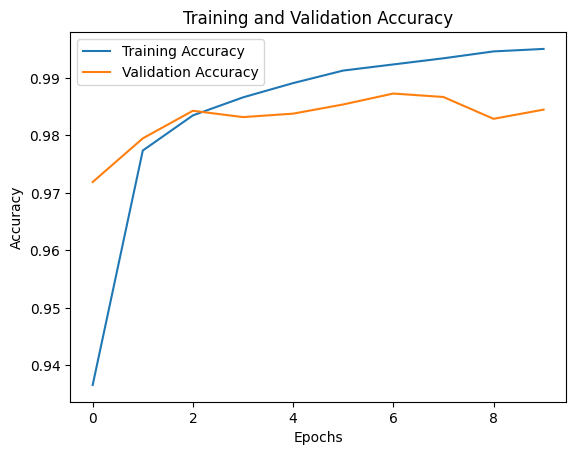

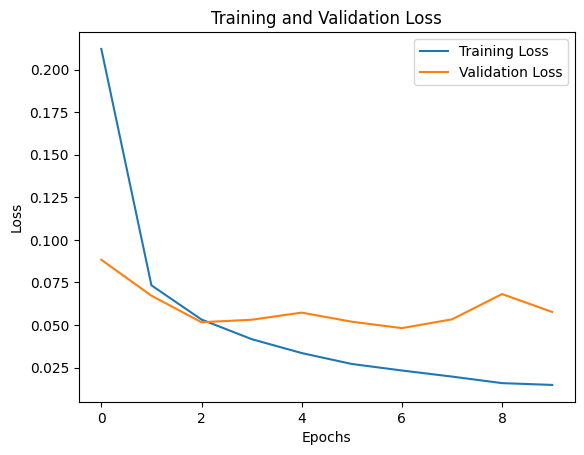

In [29]:
plt.plot(fit.history['accuracy'], label='Training Accuracy')
plt.plot(fit.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(fit.history['loss'], label='Training Loss')
plt.plot(fit.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show() 

In [30]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step 


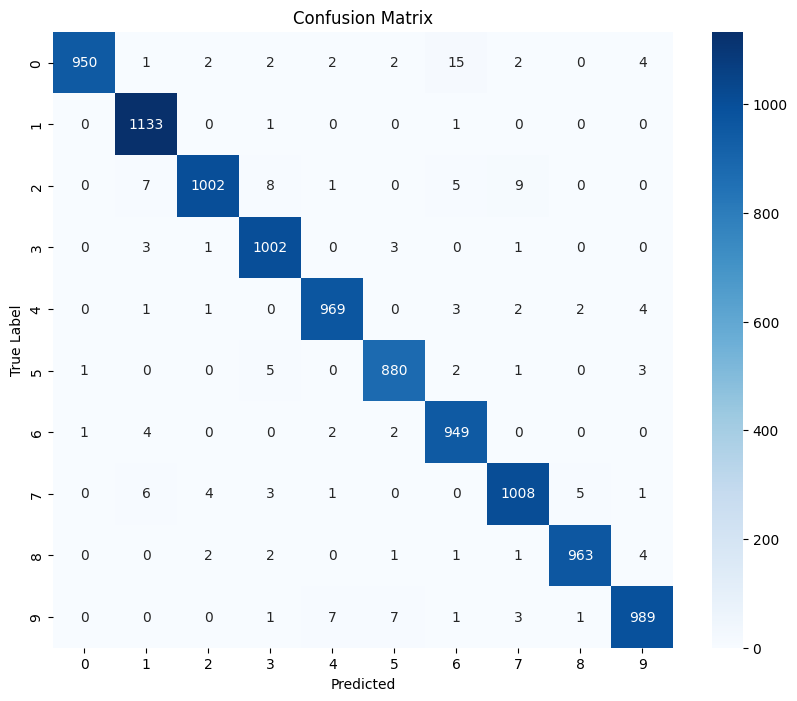

In [33]:
predicted_labels = predictions.argmax(axis=1)

# Calculating confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Visualizing confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()